In [1]:
import pandas as pd ## For DataFrame operation
import numpy as np ## Numerical python for matrix operations
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler ## Preprocessing function
import pandas_profiling ## For easy profiling of pandas DataFrame
import missingno as msno ## Missing value co-occurance analysis
import os

In [2]:
os.getcwd()

'C:\\Users\\tchan\\Zindi'

In [3]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [5]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,...,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,...,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,...,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,...,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,...,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [6]:
####### Data Exploration ############

def print_dim(df):
    '''
    Function to print the dimensions of a given python dataframe
    Required Input -
        - df = Pandas DataFrame
    Expected Output -
        - Data size
    '''
    print("Data size: Rows-{0} Columns-{1}".format(df.shape[0],df.shape[1]))

        
def do_data_profiling(df, filename):
    '''
    Function to do basic data profiling
    Required Input - 
        - df = Pandas DataFrame
        - filename = Path for output file with a .html extension
    Expected Output -
        - HTML file with data profiling summary
    '''
    profile = pandas_profiling.ProfileReport(df)
    profile.to_file(outputfile = filename)
    print("Data profiling done")

def missing_value_analysis(df):
    '''
    Function to do basic missing value analysis
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Chart of Missing value co-occurance
        - Chart of Missing value heatmap
    '''
    msno.matrix(df)
    msno.heatmap(df)

In [7]:
print_dim(train)
print_dim(test)

Data size: Rows-7094 Columns-37
Data size: Rows-2365 Columns-32


In [8]:
do_data_profiling(train,"train.html")
do_data_profiling(test, "test.html")

Data profiling done
Data profiling done


In [9]:
#Columns to convert into dummies
#Q2-Q7, Q9-Q19

In [10]:
train_df = train

In [11]:
cols = list(['Q2','Q3','Q4','Q5','Q6','Q7','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19'])

In [12]:
for col in cols:
    dummy = pd.get_dummies(train_df.loc[:,col], prefix=col)
    train_df = pd.concat([train_df, dummy], axis = 1)
    train_df = train_df.drop([col], axis=1)

In [13]:
train_df.head()

,ID,Q1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,...,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5
0,5086,98,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1258,40,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,331,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,6729,50,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8671,34,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [14]:
test_df = test

In [15]:
for col in cols:
    dummy = pd.get_dummies(test_df.loc[:,col], prefix=col)
    test_df = pd.concat([test_df, dummy], axis = 1)
    test_df = test_df.drop([col], axis=1)

In [16]:
test_df.head()

,ID,Q1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,...,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5
0,2352,30,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,8208,53,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2785,23,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2967,30,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1697,28,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [17]:
#train_df.columns.tolist()

In [18]:
train_df = train_df.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1)

In [19]:
train_df.shape

(7094, 108)

In [20]:
#test_df.columns.tolist()

In [21]:
common = list(set(train_df.columns).intersection(set(test_df.columns)))

In [22]:
len(common)

105

In [23]:
target = train_df['mobile_money_classification']

In [24]:
train_df = train_df.loc[:,common]

In [25]:
train_df = train_df.drop(['ID'], axis=1)

In [26]:
train_df.shape

(7094, 104)

In [27]:
test_df = test_df.loc[:,common]

In [28]:
test_df = test_df.drop(['ID'], axis=1)

In [29]:
test_df.shape

(2365, 104)

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [64]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb

X = train_df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [66]:
clf = XGBClassifier(
        eval_metric = 'auc',
        num_class = 2,
        nthread = 4,
        silent = 1,
        )
parameters = {
    'num_boost_round': [100, 120],
    'eta': [0.01, 0.02],
    'min_child_weight': [1,2,3],
    'max_depth': [4,5,6],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.5, 0.7],
}
clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)

In [67]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=2,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'num_boost_round': [100, 120], 'eta': [0.01, 0.02], 'min_child_weight': [1, 2, 3], 'max_depth': [4, 5, 6], 'subsample': [0.7, 0.9], 'colsample_bytree': [0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
clf.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.01,
 'max_depth': 4,
 'min_child_weight': 1,
 'num_boost_round': 100,
 'subsample': 0.9}

In [70]:
final_model = XGBClassifier(params = clf.best_params_)

In [71]:
final_model.fit(X,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob',
       params={'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'num_boost_round': 100, 'subsample': 0.9},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [72]:
from xgboost import plot_importance
from matplotlib import pyplot

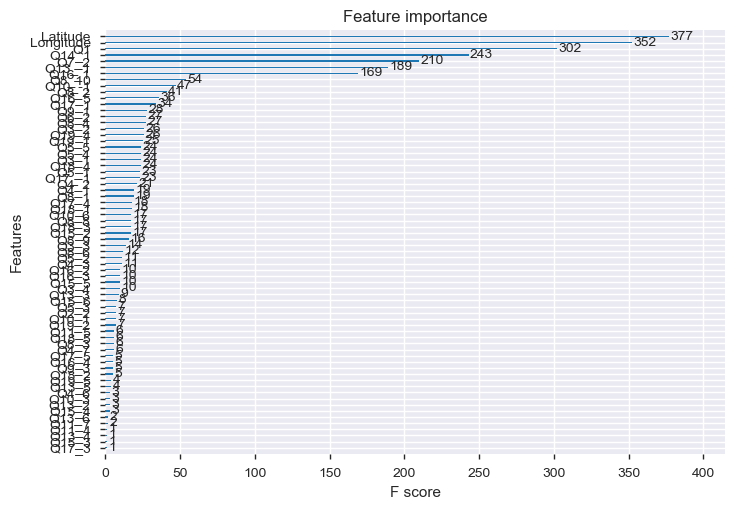

In [73]:
# plot feature importance
plot_importance(final_model)
pyplot.show()

In [74]:
final_model.predict_proba(test_df)

array([[0.00158123, 0.00358655, 0.1898831 , 0.8049491 ],
       [0.02182994, 0.04503065, 0.1569194 , 0.77622   ],
       [0.00282726, 0.01302441, 0.07529774, 0.90885055],
       ...,
       [0.17074282, 0.5853989 , 0.07165737, 0.17220095],
       [0.24393806, 0.55948   , 0.0662041 , 0.13037778],
       [0.52331096, 0.4316211 , 0.01362499, 0.03144291]], dtype=float32)

In [245]:
preds_final = pd.DataFrame(final_model.predict_proba(test_df))

In [246]:
final_submission = pd.concat([test['ID'], preds_final], axis = 1)

In [247]:
final_submission.head()

,ID,0,1,2,3
0,2352,0.001581,0.003587,0.189883,0.804949
1,8208,0.021830,0.045031,0.156919,0.776220
2,2785,0.002827,0.013024,0.075298,0.908851
3,2967,0.351659,0.555565,0.019153,0.073623
4,1697,0.001898,0.002919,0.101434,0.893748


In [248]:
final_submission.columns = ['ID', 'no_financial_services', 'other_only','mm_only','mm_plus']

In [249]:
final_submission.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.001581,0.003587,0.189883,0.804949
1,8208,0.021830,0.045031,0.156919,0.776220
2,2785,0.002827,0.013024,0.075298,0.908851
3,2967,0.351659,0.555565,0.019153,0.073623
4,1697,0.001898,0.002919,0.101434,0.893748


In [250]:
final_submission.to_csv('submission2.csv',index=False)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [76]:
clf2 = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4],
    'max_depth': [7,8,9]
}

clf2 = GridSearchCV(clf2, parameters, n_jobs=1, cv=5)

In [77]:
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4], 'max_depth': [7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
clf2.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 100}

In [79]:
final_model_rf = RandomForestClassifier(criterion = 'entropy',
                                        max_depth = 9,
                                        min_samples_split = 2,
                                        n_estimators = 100)

In [80]:
final_model_rf.fit(X,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

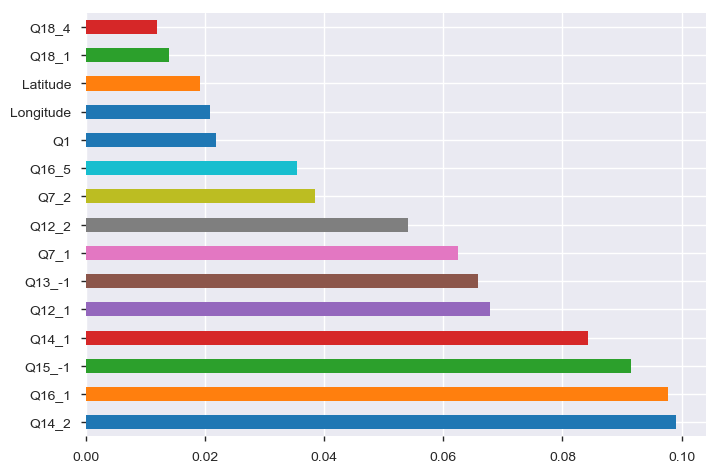

In [81]:
feat_importances = pd.Series(final_model_rf.feature_importances_, index=test_df.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [82]:
final_model_rf.predict_proba(test_df)

array([[7.56354635e-04, 1.63937337e-03, 1.81395164e-01, 8.16209108e-01],
       [1.56193849e-02, 3.68729401e-02, 1.82925348e-01, 7.64582327e-01],
       [1.51240715e-03, 9.43895830e-03, 1.70429799e-01, 8.18618835e-01],
       ...,
       [2.51720766e-01, 4.80751411e-01, 7.10702526e-02, 1.96457570e-01],
       [3.13349540e-01, 4.96557840e-01, 5.02541479e-02, 1.39838472e-01],
       [5.15339498e-01, 4.31060063e-01, 1.80675970e-02, 3.55328423e-02]])

In [83]:
preds_final_rf = pd.DataFrame(final_model_rf.predict_proba(test_df))

In [84]:
final_submission = pd.concat([test['ID'], preds_final_rf], axis = 1)

In [85]:
final_submission.columns = ['ID', 'no_financial_services', 'other_only','mm_only','mm_plus']

In [86]:
final_submission.to_csv('submission_rf3.csv',index=False)

In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn import preprocessing, model_selection


from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

Using TensorFlow backend.


In [88]:
data = train
data = data.drop(['ID'], axis =1)

In [89]:
X = data.drop(['mobile_money_classification','mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1)
X = np.array(X)
Y = data['mobile_money_classification']

In [90]:
# Transform name species into numerical values 
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
print(Y)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [92]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [98]:
input_dim = len(data.columns) - 5

model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 25, batch_size = 5)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/25
5675/5675 [==============================] - 1s 186us/step - loss: 0.9642 - acc: 0.5824
Epoch 2/25
5675/5675 [==============================] - 1s 138us/step - loss: 0.8369 - acc: 0.6404
Epoch 3/25
5675/5675 [==============================] - 1s 145us/step - loss: 0.8190 - acc: 0.6451
Epoch 4/25
5675/5675 [==============================] - 1s 157us/step - loss: 0.8076 - acc: 0.6529
Epoch 5/25
5675/5675 [==============================] - 1s 141us/step - loss: 0.8069 - acc: 0.6478
Epoch 6/25
5675/5675 [==============================] - 1s 140us/step - loss: 0.8023 - acc: 0.6497
Epoch 7/25
5675/5675 [==============================] - 1s 140us/step - loss: 0.7980 - acc: 0.6539
Epoch 8/25
5675/5675 [==============================] - 1s 139us/step - loss: 0.7934 - acc: 0.6539
Epoch 9/25
5675/5675 [==============================] - 1s 152us/step - loss: 0.7916 - acc: 0.6499
Epoch 10/25
5675/5675 [==============================] - 1s 141us/step - loss: 0.7875 - acc: 0.6613
Epoch 11/

In [99]:
X_test = test.drop(['ID'], axis = 1)
X_test = np.array(X_test)

In [100]:
predictions = model.predict_proba(X_test)
predictions

array([[3.8456768e-05, 1.0095656e-04, 2.1004631e-01, 7.8981429e-01],
       [2.7410802e-02, 3.8627822e-02, 1.8423824e-01, 7.4972314e-01],
       [2.1890560e-03, 9.5606837e-03, 1.8399413e-01, 8.0425614e-01],
       ...,
       [2.5316209e-01, 2.9029158e-01, 1.4290287e-01, 3.1364343e-01],
       [1.9881749e-01, 6.4974993e-01, 3.0435730e-02, 1.2099681e-01],
       [5.5339766e-01, 4.2871088e-01, 1.2346427e-02, 5.5450015e-03]],
      dtype=float32)

In [101]:
preds_nn = pd.DataFrame(model.predict_proba(X_test))
final_submission = pd.concat([test['ID'], preds_nn], axis = 1)
final_submission.columns = ['ID', 'no_financial_services', 'other_only','mm_only','mm_plus']

In [102]:
final_submission.to_csv('submission_nn2.csv',index=False)